In [385]:
# Importing data manipulation libraries
import pandas as pd
import numpy as np

# Importing machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing serialization library
import pickle
import math

In [386]:
# Loading the serialized DataFrame from the 'odi_data_extract.pkl' file
dataframe_3 = pickle.load(open('odi_data_extract.pkl', 'rb'))

In [387]:
# Removing rows where either batting_team or bowling_team is Netherlands, Scotland, Kenya, Afghanistan or Ireland
# Defining the teams to be excluded
excluded_teams = ["Netherlands", "Scotland", "Kenya", "Ireland", "Afghanistan"]

# Removing rows where either batting_team or bowling_team is in the excluded teams
dataframe_3 = dataframe_3[~dataframe_3["batting_team"].isin(excluded_teams)]
dataframe_3 = dataframe_3[~dataframe_3["bowling_team"].isin(excluded_teams)]

dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,NaN,Pallekele International Cricket Stadium
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,NaN,Pallekele International Cricket Stadium
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,NaN,Pallekele International Cricket Stadium
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,NaN,Pallekele International Cricket Stadium


In [388]:
# Displaying information about the DataFrame
dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530005 entries, 0 to 715579
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   match_id                   530005 non-null  int64  
 1   batting_team               530005 non-null  object 
 2   bowling_team               530005 non-null  object 
 3   toss_winner                530005 non-null  object 
 4   toss_decision_from_winner  530005 non-null  object 
 5   ball                       530005 non-null  float64
 6   runs                       530005 non-null  int64  
 7   player_dismissed           530005 non-null  object 
 8   city                       454151 non-null  object 
 9   venue                      530005 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 44.5+ MB


In [389]:
# Checking for missing values in each column and display the sum of missing values
dataframe_3.isnull().sum()

match_id                         0
batting_team                     0
bowling_team                     0
toss_winner                      0
toss_decision_from_winner        0
ball                             0
runs                             0
player_dismissed                 0
city                         75854
venue                            0
dtype: int64

In [390]:
# Find stadiums with low occurrences

# Defining the threshold for low occurrences stadiums
low_occurrences_threshold = (
    800  
)

# Find stadiums with low occurrences
venue_counts = dataframe_3["venue"].value_counts()
low_occurrences_stadiums = venue_counts[
    venue_counts < low_occurrences_threshold
].index.tolist()

# Remove rows corresponding to low occurrences stadiums
dataframe_3 = dataframe_3[~dataframe_3["venue"].isin(low_occurrences_stadiums)]

dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,NaN,Pallekele International Cricket Stadium
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,NaN,Pallekele International Cricket Stadium
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,NaN,Pallekele International Cricket Stadium
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,NaN,Pallekele International Cricket Stadium


In [391]:
# Identifying venues where 'city' information is missing and count occurrences for each venue
dataframe_3[dataframe_3['city'].isnull()]['venue'].value_counts()

venue
Harare Sports Club                         15310
Sydney Cricket Ground                      10301
Rangiri Dambulla International Stadium     10051
Melbourne Cricket Ground                    8696
Adelaide Oval                               7725
Pallekele International Cricket Stadium     6721
Dubai International Cricket Stadium         6008
Sharjah Cricket Stadium                     4363
Rawalpindi Cricket Stadium                  1513
Multan Cricket Stadium                      1509
Queenstown Events Centre                     909
Chittagong Divisional Stadium                900
Name: count, dtype: int64

In [392]:
dataframe_3['venue'].value_counts()

venue
Shere Bangla National Stadium                           24107
Harare Sports Club                                      21932
Sydney Cricket Ground                                   13651
R Premadasa Stadium                                     12945
Rangiri Dambulla International Stadium                  12453
                                                        ...  
Jade Stadium                                              840
Providence Stadium, Guyana                                840
Queen's Park Oval, Port of Spain, Trinidad                840
Marrara Cricket Ground                                    839
Punjab Cricket Association IS Bindra Stadium, Mohali      838
Name: count, Length: 132, dtype: int64

In [393]:
# Getting the unique values in the 'venue' column
all_stadiums = dataframe_3['venue'].unique()

# Printing the names of all stadiums
for stadium in all_stadiums:
    print(stadium)

Brisbane Cricket Ground, Woolloongabba
Melbourne Cricket Ground
Western Australia Cricket Association Ground
Sydney Cricket Ground
Adelaide Oval
Manuka Oval
Harare Sports Club
Hagley Oval
Saxton Oval
Eden Park
Seddon Park
Westpac Stadium
Kennington Oval
Edgbaston
Sophia Gardens
Sir Vivian Richards Stadium, North Sound
Kensington Oval, Bridgetown
Shere Bangla National Stadium
Zahur Ahmed Chowdhury Stadium
Himachal Pradesh Cricket Association Stadium
Feroz Shah Kotla
Punjab Cricket Association Stadium, Mohali
JSCA International Stadium Complex
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Headingley
The Rose Bowl
Lord's
Old Trafford
Trent Bridge
County Ground
Maharashtra Cricket Association Stadium
Barabati Stadium
Eden Gardens
Sharjah Cricket Stadium
Sheikh Zayed Stadium
Queens Sports Club
Boland Park
Buffalo Park
Providence Stadium
Rangiri Dambulla International Stadium
Sinhalese Sports Club Ground
Queen's Park Oval, Port of Spain
Sabina Park, Kingston
Mahinda Rajapaksa Internati

In [394]:
# Using np.where to fill missing 'city' values with the first word from 'venue' column
cities = np.where(
    dataframe_3["city"].isnull(),
    dataframe_3["venue"].str.split().apply(lambda x: x[0]),
    dataframe_3["city"],
)

# Assigning the values from the 'cities' array to the 'city' column in dataframe_3
dataframe_3.loc[:, "city"] = cities

In [395]:
# Checking for missing values in each column and display the sum of missing values
dataframe_3.isnull().sum()

match_id                     0
batting_team                 0
bowling_team                 0
toss_winner                  0
toss_decision_from_winner    0
ball                         0
runs                         0
player_dismissed             0
city                         0
venue                        0
dtype: int64

In [396]:
# Getting the unique values in the 'venue' column
all_cities = dataframe_3['city'].unique()

# # Printing the names of all stadiums
for city in all_cities:
    print(city)

Brisbane
Melbourne
Perth
Sydney
Adelaide
Canberra
Harare
Christchurch
Nelson
Auckland
Hamilton
Wellington
London
Birmingham
Cardiff
Antigua
Barbados
Mirpur
Chittagong
Dharmasala
Delhi
Chandigarh
Ranchi
Visakhapatnam
Leeds
Southampton
Manchester
Nottingham
Bristol
Pune
Cuttack
Kolkata
Sharjah
Abu Dhabi
Bulawayo
Paarl
East London
Guyana
Rangiri
Colombo
Trinidad
Jamaica
Hambantota
Pallekele
Mount Maunganui
Dunedin
Chennai
Indore
Nagpur
Chester-le-Street
Mumbai
Kanpur
Dubai
Durban
Centurion
Cape Town
Johannesburg
Port Elizabeth
Dharamsala
Dhaka
Bloemfontein
Hobart
St Kitts
Sylhet
Chattogram
Napier
Hyderabad
Potchefstroom
Rajkot
Providence
Karachi
Kandy
Rawalpindi
North Sound
Bridgetown
Ahmedabad
Lahore
Multan
Cairns
Port of Spain
Lucknow
Bengaluru
St Vincent
Vadodara
Peshawar
Bogra
Queenstown
St Lucia
Grenada
Jaipur
Kuala Lumpur
Faisalabad
Bangalore
Kochi
Guwahati
Darwin
Dominica
Benoni
Dambulla
Gqeberha
Fatullah


In [397]:
# Convert 'runs' to numeric, replacing non-numeric with NaN
dataframe_3 = dataframe_3.assign(
    runs=pd.to_numeric(dataframe_3["runs"], errors="coerce")
)

# Create 'current_score' with cumulative sum using .groupby() and .cumsum()
dataframe_3 = dataframe_3.assign(
    current_score=dataframe_3.groupby("match_id")["runs"].cumsum()
)

In [398]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1
...,...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,Pallekele,Pallekele International Cricket Stadium,194
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,Pallekele,Pallekele International Cricket Stadium,194
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,Pallekele,Pallekele International Cricket Stadium,195
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,Pallekele,Pallekele International Cricket Stadium,195


In [399]:
# Creating a new column 'over' with the over number
dataframe_3["over"] = dataframe_3["ball"].apply(lambda x: str(x).split(".")[0])


# Creating a new column 'ball_number' with the ball number within the over
dataframe_3["ball_number"] = dataframe_3["ball"].apply(lambda x: str(x).split(".")[1])

In [400]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,5
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,6
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,Pallekele,Pallekele International Cricket Stadium,195,39,7
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,Pallekele,Pallekele International Cricket Stadium,195,40,1


In [401]:
# Creating a new column 'balls_bowled' representing the total number of balls bowled in a match
dataframe_3["balls_bowled"] = (dataframe_3["over"].astype(int) * 6) + dataframe_3[
    "ball_number"
].astype(int)

In [402]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,5,239
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,6,240
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,Pallekele,Pallekele International Cricket Stadium,195,39,7,241
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,Pallekele,Pallekele International Cricket Stadium,195,40,1,241


In [403]:
# Creating a new column 'balls_left' representing the number of balls left in an ODI match
dataframe_3["balls_left"] = 300 - dataframe_3["balls_bowled"]

# Replacing any negative values with 0
dataframe_3["balls_left"] = dataframe_3["balls_left"].clip(lower=0)

In [404]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled,balls_left
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1,299
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2,298
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3,297
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4,296
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,5,239,61
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,6,240,60
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,Pallekele,Pallekele International Cricket Stadium,195,39,7,241,59
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,Pallekele,Pallekele International Cricket Stadium,195,40,1,241,59


In [405]:
# Converting 'player_dismissed' column to numeric values, filling NaN with 0, and convert to integers
dataframe_3["player_dismissed"] = (
    pd.to_numeric(dataframe_3["player_dismissed"], errors="coerce")
    .fillna(0)
    .astype(int)
)

# Calculating the cumulative sum of dismissals ('player_dismissed') for each match
dataframe_3["player_dismissed"] = dataframe_3.groupby("match_id")[
    "player_dismissed"
].cumsum()

# Creating a new column 'wickets_left' representing the number of wickets remaining in each match
dataframe_3["wickets_left"] = 10 - dataframe_3["player_dismissed"]

# Check the minimum and maximum values in the 'player_dismissed' column
print(dataframe_3["player_dismissed"].min())
print(dataframe_3["player_dismissed"].max())

# Check the minimum and maximum values in the 'wickets_left' column
print(dataframe_3["wickets_left"].min())
print(dataframe_3["wickets_left"].max())

0
0
10
10


In [406]:
dataframe_3

,match_id,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled,balls_left,wickets_left
0,1,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1,299,10
1,1,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2,298,10
2,1,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3,297,10
3,1,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4,296,10
4,1,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5,295,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715575,2478,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,5,239,61,10
715576,2478,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,6,240,60,10
715577,2478,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,Pallekele,Pallekele International Cricket Stadium,195,39,7,241,59,10
715578,2478,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,Pallekele,Pallekele International Cricket Stadium,195,40,1,241,59,10


In [407]:
# Calculating the current run rate and create a new column 'current_run_rate'
dataframe_3['current_run_rate'] = (dataframe_3['current_score'] * 6) / dataframe_3['balls_bowled']

In [408]:
# # Grouping the DataFrame by 'match_id'
# groups = dataframe_3.groupby('match_id')

# # Getting unique match_ids
# match_ids = dataframe_3['match_id'].unique()

# # Initializing an empty list to store the rolling sum of runs for the last 30 balls in each match
# last_five = []

# # Iterating through each match_id
# for match_id in match_ids:
#     # Extracting the data for the current match_id
#     match_data = groups.get_group(match_id)
    
#     # Calculating the rolling sum of runs for the last 30 balls and convert it to a list
#     runs_rolling_sum = match_data['runs'].rolling(window=30).sum().values.tolist()
    
#     # Extending the 'last_five' list with the rolling sum values
#     last_five.extend(runs_rolling_sum)

In [409]:
# Calculating the rolling sum of runs for the last 30 balls in each match
dataframe_3["last_five"] = (
    dataframe_3.groupby("match_id")["runs"]
    .rolling(window=30)
    .sum()
    .reset_index(0, drop=True)
)

In [410]:
# Group the DataFrame by 'match_id' and calculate the sum of runs for each match and merging the grouped data back with the original DataFrame based on 'match_id'
dataframe_3 = dataframe_3.groupby('match_id')['runs'].sum().reset_index().merge(dataframe_3, on='match_id')

In [411]:
dataframe_3

,match_id,runs_x,batting_team,bowling_team,toss_winner,toss_decision_from_winner,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_number,balls_bowled,balls_left,wickets_left,current_run_rate,last_five
0,1,268,Australia,Pakistan,Australia,bat,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,1,1,299,10,0.000000,NaN
1,1,268,Australia,Pakistan,Australia,bat,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,2,2,298,10,0.000000,NaN
2,1,268,Australia,Pakistan,Australia,bat,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,3,3,297,10,0.000000,NaN
3,1,268,Australia,Pakistan,Australia,bat,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",0,0,4,4,296,10,0.000000,NaN
4,1,268,Australia,Pakistan,Australia,bat,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",1,0,5,5,295,10,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484631,2478,195,Sri Lanka,Australia,Sri Lanka,bat,39.5,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,5,239,61,10,4.870293,24.0
484632,2478,195,Sri Lanka,Australia,Sri Lanka,bat,39.6,0,0,Pallekele,Pallekele International Cricket Stadium,194,39,6,240,60,10,4.850000,23.0
484633,2478,195,Sri Lanka,Australia,Sri Lanka,bat,39.7,1,0,Pallekele,Pallekele International Cricket Stadium,195,39,7,241,59,10,4.854772,24.0
484634,2478,195,Sri Lanka,Australia,Sri Lanka,bat,40.1,0,0,Pallekele,Pallekele International Cricket Stadium,195,40,1,241,59,10,4.854772,23.0


In [412]:
# Drop rows with missing values from the DataFrame in-place
dataframe_3.dropna(inplace=True)

In [413]:
# Selecting specific columns from the DataFrame dataframe_3 to create a new DataFrame final_dataframe for predicting features
final_dataframe = dataframe_3[['batting_team', 'bowling_team', 'toss_winner', 'toss_decision_from_winner', 'current_score', 'current_run_rate', 'balls_left', 'wickets_left', 'last_five', 'city', 'venue', 'runs_x']]

In [414]:
final_dataframe

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue,runs_x
29,Australia,Pakistan,Australia,bat,13,2.689655,271,10,13.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
30,Australia,Pakistan,Australia,bat,13,2.600000,270,10,13.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
31,Australia,Pakistan,Australia,bat,14,2.709677,269,10,14.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
32,Australia,Pakistan,Australia,bat,15,2.812500,268,10,15.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
33,Australia,Pakistan,Australia,bat,16,2.909091,267,10,16.0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",268
...,...,...,...,...,...,...,...,...,...,...,...,...
484631,Sri Lanka,Australia,Sri Lanka,bat,194,4.870293,61,10,24.0,Pallekele,Pallekele International Cricket Stadium,195
484632,Sri Lanka,Australia,Sri Lanka,bat,194,4.850000,60,10,23.0,Pallekele,Pallekele International Cricket Stadium,195
484633,Sri Lanka,Australia,Sri Lanka,bat,195,4.854772,59,10,24.0,Pallekele,Pallekele International Cricket Stadium,195
484634,Sri Lanka,Australia,Sri Lanka,bat,195,4.854772,59,10,23.0,Pallekele,Pallekele International Cricket Stadium,195


In [415]:
# Checking for missing values in each column of the DataFrame final_dataframe
final_dataframe.isnull().sum()

batting_team                 0
bowling_team                 0
toss_winner                  0
toss_decision_from_winner    0
current_score                0
current_run_rate             0
balls_left                   0
wickets_left                 0
last_five                    0
city                         0
venue                        0
runs_x                       0
dtype: int64

In [416]:
# # Numerical columns
# numerical_columns = final_dataframe.select_dtypes(include=['int64', 'float64']).columns

# # Plotting histograms for numerical columns
# for col in numerical_columns:
#     plt.figure(figsize=(8, 6), dpi=1000)  
#     plt.hist(
#         final_dataframe[col], bins=20, edgecolor="k", alpha=0.7
#     )  # Add transparency to histogram
#     plt.title(f"Histogram of {col}", fontsize=18)  
#     plt.xlabel(col, fontsize=16)  
#     plt.ylabel("Frequency", fontsize=16)  
#     plt.grid(axis="y", alpha=0.75)  
#     plt.tight_layout()  
#     plt.savefig(
#         f"images/{col}_histogram.png", dpi=1000, bbox_inches="tight"
#     )  # Save as high-resolution PNG
#     plt.show()

In [417]:
# # Creating histograms
# columns_to_plot = ['current_score', 'current_run_rate', 'balls_left', 'wickets_left','last_five', 'runs_x']

# for column in columns_to_plot:
#     plt.figure(figsize=(4, 4))
#     sns.histplot(data=final_dataframe, x=column, kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

In [418]:
# categorical_columns = [
#     "batting_team",
#     "bowling_team",
#     "city",
#     "venue",
#     "toss_winner",
#     "toss_decision_from_winner",
# ]

# for col in categorical_columns:
#     category_counts = final_dataframe[col].value_counts()
#     plt.figure(figsize=(15, 20), dpi=1000)

#     # Create a subplot to have dedicated space for the title
#     ax = plt.subplot(2, 1, 1)

#     plt.pie(
#         category_counts,
#         labels=category_counts.index,
#         autopct="%1.0f%%",
#         startangle=140,
#         textprops={"size": "large", "weight": "bold"},
#     )
#     plt.axis("equal")

#     # Add the title above the subplot
#     plt.title(f"Pie Chart of {col}", fontsize=30, pad=20, weight="bold")

#     plt.subplots_adjust(top=0.8)

#     plt.tight_layout()
#     plt.savefig(f"images/{col}_pie_chart.png", dpi=1000, bbox_inches="tight")
#     plt.show()

In [419]:
# # Plotting bar chart for categorical_columns
# categorical_columns = ["batting_team", "bowling_team", "city", "venue", 'toss_winner', 'toss_decision_from_winner']

# # Loop through each categorical column
# for column in categorical_columns:
#     # Plot a bar chart for the categorical column
#     plt.figure(figsize=(8, 6))
#     category_counts = final_dataframe[column].value_counts()
#     category_counts.plot(kind="bar", color="skyblue")
#     plt.title(f"Number of Matches by {column}")
#     plt.xlabel(column)
#     plt.ylabel("Number of Matches")
#     plt.tick_params(axis="x", rotation=45)
#     plt.tight_layout()
#     plt.savefig(f"images/{column}_bar_chart.png", dpi=1000, bbox_inches="tight")
#     plt.show()

In [420]:
# Randomly shuffle the rows of the DataFrame
final_dataframe = final_dataframe.sample(final_dataframe.shape[0])

In [421]:
# Extracting features (X) and target variable (y)
X = final_dataframe.drop("runs_x", axis=1)
y = final_dataframe["runs_x"]

In [422]:
# Splitting the data into training (60%), test (20%), and validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [423]:
X_train

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue
163299,Bangladesh,England,England,field,116,3.606218,107,10,8.0,Barbados,"Kensington Oval, Bridgetown"
138520,England,Pakistan,Pakistan,field,35,6.000000,265,10,29.0,Southampton,The Rose Bowl
354562,Bangladesh,Zimbabwe,Zimbabwe,field,112,3.929825,129,10,14.0,Bulawayo,Queens Sports Club
430052,Pakistan,Sri Lanka,Pakistan,bat,37,2.921053,224,10,17.0,Mirpur,Shere Bangla National Stadium
114172,South Africa,Australia,Australia,field,352,7.489362,18,10,70.0,Centurion,"SuperSport Park, Centurion"
...,...,...,...,...,...,...,...,...,...,...,...
313927,England,India,England,bat,82,5.406593,209,10,21.0,Mumbai,Wankhede Stadium
347803,Sri Lanka,Australia,Australia,field,185,4.422311,49,10,26.0,London,Kennington Oval
402478,Australia,India,Australia,bat,99,6.750000,212,10,29.0,Sydney,Sydney Cricket Ground
408717,Zimbabwe,Pakistan,Zimbabwe,bat,145,3.198529,28,10,11.0,Sharjah,Sharjah Cricket Association Stadium


In [424]:
X_test

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue
442139,Bangladesh,India,Bangladesh,bat,177,4.657895,72,10,27.0,Mirpur,Shere Bangla National Stadium
419798,Australia,New Zealand,Australia,bat,176,5.028571,90,10,16.0,Sydney,Sydney Cricket Ground
170846,New Zealand,England,New Zealand,bat,73,5.840000,225,10,27.0,Perth,Western Australia Cricket Association Ground
413969,South Africa,England,South Africa,bat,206,4.699620,37,10,31.0,London,"Kennington Oval, London"
63408,Pakistan,India,Pakistan,bat,194,4.600791,47,10,39.0,Dubai,Dubai International Cricket Stadium
...,...,...,...,...,...,...,...,...,...,...,...
230099,England,India,India,field,184,4.863436,73,10,18.0,Cuttack,Barabati Stadium
435760,Australia,South Africa,South Africa,field,132,4.771084,134,10,23.0,Harare,Harare Sports Club
200748,India,Pakistan,India,bat,193,6.579545,124,10,23.0,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
197005,New Zealand,England,England,field,43,2.898876,211,10,9.0,Bristol,County Ground


In [425]:
X_validation

,batting_team,bowling_team,toss_winner,toss_decision_from_winner,current_score,current_run_rate,balls_left,wickets_left,last_five,city,venue
54107,Australia,England,England,field,175,5.303030,102,10,20.0,London,Lord's
253483,Australia,India,India,field,117,4.529032,145,10,18.0,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
86718,West Indies,Bangladesh,Bangladesh,field,121,3.989011,118,10,24.0,Dhaka,Shere Bangla National Stadium
107077,South Africa,India,India,field,240,6.153846,66,10,52.0,Lucknow,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...
373737,Australia,Zimbabwe,Zimbabwe,field,32,5.333333,264,10,22.0,Harare,Harare Sports Club
...,...,...,...,...,...,...,...,...,...,...,...
184698,West Indies,England,England,field,104,4.105263,148,10,15.0,Birmingham,Edgbaston
104974,West Indies,New Zealand,New Zealand,field,133,4.694118,130,10,28.0,Bridgetown,"Kensington Oval, Bridgetown, Barbados"
186986,England,India,England,bat,265,5.678571,20,10,42.0,London,Kennington Oval
321347,England,West Indies,West Indies,field,116,5.043478,162,10,21.0,Southampton,The Rose Bowl


In [426]:
# Taking categorical and Numercial data :
categorical_columns = ['batting_team', 'bowling_team', 'toss_winner', 'toss_decision_from_winner', 'city', 'venue']

numerical_columns = [col for col in X.columns if col not in categorical_columns]

In [427]:
# Creating a ColumnTransformer with separate transformations for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(drop='first'), categorical_columns)
    ])

In [428]:
#XGBRegressor
# XGBRegressor_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1))
# ])

# XGBRegressor_pipeline.fit(X_train, y_train)

# y_pred = XGBRegressor_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)

# print(f"R-squared: {r2 : .2f}")
# print(f"Mean Absolute Error: {mae : .2f}")
# print(f"RMSE: {rmse : .2f}")
# print(f"MSE: {mse : 2f}")

In [429]:
# param_grid = {
#     'model__learning_rate': [0.1, 0.2, 0.3],
#     'model__max_depth': [10, 12, 15],
#     'model__n_estimators': [500, 1000, 1500]
# }

# grid_search = GridSearchCV(XGBRegressor_pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)

R-squared:  0.99
Mean Absolute Error:  2.78
RMSE:  7.11
MSE:  50.554065
AUC-ROC:  1.00


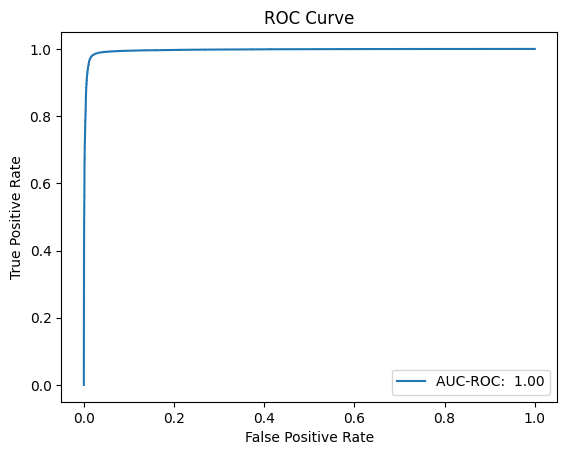

In [430]:
# XGBRegressor
# XGBRegressor_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', XGBRegressor(n_estimators=1500, learning_rate=0.1, max_depth=15, random_state=1))
# ])

# XGBRegressor_pipeline.fit(X_train, y_train)

# y_pred = XGBRegressor_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)

# print(f"R-squared: {r2 : .2f}")
# print(f"Mean Absolute Error: {mae : .2f}")
# print(f"RMSE: {rmse : .2f}")
# print(f"MSE: {mse : 2f}")

# XGBRegressor
XGBRegressor_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "model",
            XGBRegressor(
                n_estimators=1500, learning_rate=0.1, max_depth=15, random_state=1
            ),
        ),
    ]
)

XGBRegressor_pipeline.fit(X_train, y_train)

y_pred = XGBRegressor_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2 : .2f}")
print(f"Mean Absolute Error: {mae : .2f}")
print(f"RMSE: {rmse : .2f}")
print(f"MSE: {mse : 2f}")


# Define a threshold for y_test to get the binary classification (keep y_pred continuous)
threshold = np.percentile(y_test, 50)  # You can experiment with different percentiles
y_test_binary = (y_test > threshold).astype(int)

# Calculate the AUC-ROC score using continuous y_pred
auc_roc = roc_auc_score(y_test_binary, y_pred)
print(f"AUC-ROC: {auc_roc : .2f}")

# Calculate the ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test_binary, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC-ROC: {auc_roc : .2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [431]:
# LGBMRegressor_pipeline = Pipeline(
#     [
#         ("preprocessor", preprocessor),
#         (
#             "model",
#             LGBMRegressor(
#                 learning_rate=0.1, n_estimators=1500, max_depth=15, random_state=1
#             ),
#         ),
#     ]
# )

# LGBMRegressor_pipeline.fit(X_train, y_train)
# y_pred = LGBMRegressor_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)

# print(f"R-squared: {r2 : .2f}")
# print(f"Mean Absolute Error: {mae : .2f}")
# print(f"RMSE: {rmse : .2f}")
# print(f"MSE: {mse : 2f}")

In [432]:
# GB_pipeline = Pipeline(
#     [
#         ("preprocessor", preprocessor),
#         (
#             "model",
#             GradientBoostingRegressor(
#                 n_estimators=1000, learning_rate=0.05, max_depth=15, random_state=1
#             ),
#         ),
#     ]
# )

# GB_pipeline.fit(X_train, y_train)
# y_pred = GB_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)

# print(f"R-squared: {r2 : .2f}")
# print(f"Mean Absolute Error: {mae : .2f}")
# print(f"RMSE: {rmse : .2f}")
# print(f"MSE: {mse : 2f}")

In [433]:
# # Lasso regression model
# lasso = Lasso(alpha=1.0)


# lasso_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', lasso)
# ])


# lasso_pipeline.fit(X_train, y_train)


# y_pred = lasso_pipeline.predict(X_test)


# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)


# print(f"R-squared: {r2:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MSE: {mse:.2f}")

In [434]:
# # Ridge regression model
# ridge = Ridge(alpha=1.0) 


# ridge_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', ridge)
# ])


# ridge_pipeline.fit(X_train, y_train)


# y_pred = ridge_pipeline.predict(X_test)


# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)


# print(f"R-squared: {r2:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MSE: {mse:.2f}")

In [435]:
# # Linear Regression model
# linear_reg = LinearRegression()


# linear_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', linear_reg)
# ])


# linear_pipeline.fit(X_train, y_train)


# y_pred = linear_pipeline.predict(X_test)


# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)


# print(f"R-squared: {r2:.2f}")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MSE: {mse:.2f}")

In [436]:
# CatBoostRegressor_pipeline = Pipeline(
#     [
#         ("preprocessor", preprocessor),
#         (
#             "model",
#             CatBoostRegressor(
#                 iterations=1500, learning_rate=1, depth=15, random_state=1
#             ),
#         ),
#     ]
# )

# CatBoostRegressor_pipeline.fit(X_train, y_train)
# y_pred = CatBoostRegressor_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)

# print(f"R-squared: {r2 : .2f}")
# print(f"Mean Absolute Error: {mae : .2f}")
# print(f"RMSE: {rmse : .2f}")
# print(f"MSE: {mse : 2f}")

In [437]:
# RandomForest_pipeline = Pipeline(
#     [
#         ("preprocessor", preprocessor),
#         (
#             "model",
#             RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=1),
#         ),
#     ]
# )

# RandomForest_pipeline.fit(X_train, y_train)
# y_pred = RandomForest_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse = mean_squared_error(y_test, y_pred)

# print(f"R-squared: {r2 : .2f}")
# print(f"Mean Absolute Error: {mae : .2f}")
# print(f"RMSE: {rmse : .2f}")
# print(f"MSE: {mse : 2f}")

In [438]:
pickle.dump(XGBRegressor_pipeline,open('XGB_pipeline.pkl','wb'))